##### FLux Example: Fitting a Straight Line

https://fluxml.ai/Flux.jl/stable/guide/models/overview/

+ Flux is a Deep Learning package built in pure Julia.

+ Besides Deep Learning, Flux can also be used for "standard" Machine Learning.

+ This notebook is an example of using FLUX for a simple ML task: Fitting a straight line. 

+ These are the steps:

1. Get and prepare the ***training*** and ***testing*** data

2. Build a model with ***configurable parameters*** to make predictions

3. Iteratively train the model by tweaking the parameters to improve predictions

4. Test and verify the model

+ Flux uses ***automatic differentiation***  for gradient to perform, and improve predictions. 

+ Since Flux is written in Julia in principle modifyng the model structure (changing the configuration and location of layers within the model) can be done directly in Julia to improve the understanding of Flux operations and/or improve model performance.


### Line to fit

y = 4x + 2


In [1]:
using Flux
y(x) = 4x + 2


y (generic function with 1 method)

### Prepare Training and Testing Data

In [2]:
x_train, x_test = hcat(0:5...), hcat(6:10...)

# use the function y from a previous cell generate y_train and y_test
y_train, y_test = y.(x_train), y.(x_test)

@show(x_train)
@show(x_test)
@show(y_train)
@show(y_test)

x_train = [0 1 2 3 4 5]
x_test = [6 7 8 9 10]
y_train = [2 6 10 14 18 22]
y_test = [26 30 34 38 42]


1×5 Matrix{Int64}:
 26  30  34  38  42

#### Build a Dense Model to make predictions

#### Models and Layers 

+ ***Models*** in Deep Learning (in Flux, Tensorflow, Python, ...) have one or more ***layers***.

+ ***Layers*** are the fundamental building blocks of a Neural Net. 

+ Layers perform specific mathematical operations on their inputs data to produce an output. 

+ Layers are individual computational units that are combined to form a complete model, or network.

[https://docs.google.com/presentation/d/1enC7SsWr4rSFrHYWFym5qbhoVxfDUZQjmAO8euPY2jw/edit#slide=id.g3ffb334e74_0_28]



##### Types of Layers

+ Flux provides several of the most common pre-built layer types for common deep learning operations:

1. Dense: Fully connected layer where each unit (neuron) connects to all neurons in the previous layer. 

2. Conv: Convolutional layer, typically used for processing image data.

4. RNN / LSTM / GRU: These are ***Recurrent layers*** commonly used for sequential data, like text or time series.

    + RNN :Recurrent Neural Nets are designed for sequential data by incorporating loops that allow information to persist. 

    + LSTM: Long Short-Term Memory. This architecture is designed to address the "vanishing gradient problem" that can occur in traditional RNNs. 
        + LSTMs have a more complex internal structure that allows them to better retain information over longer sequences. 
        + LSTMs can achieve this through specialized "gates" that control the flow of information, enabling them to remember or forget data selectively.

    + GRU: Gated Recurrent Unit. This variation of an RNN, is similar to LSTMs. Designed to address the vanishing gradient problem.
        + GRUs are generally simpler than LSTMs, having fewer gates. This can make them more efficient to train and run, 
         + while still offering good performance on many tasks.

5. BatchNorm: Batch normalization layer for improving training stability.

6. Dropout: Dropout layer for regularization.

7. Custom Layers: These are used defined layers for specific, custom needs. These moddels can be defined directly as Julia functions. 

##### Process Flow (Functionality)

1. Transformation: Each layer applies a specific transformation to the input data, such as a linear transformation, convolution, or activation function.

2. Parameters: Many layers have trainable parameters (like weights and biases in Dense layers) that are adjusted during the learning process.

3. Chaining: Layers are designed to be chained together. The output of one layer becomes the input to the next, allowing the configuration of complex network architectures, or models.


##### Dense  Layer 

A ***Dense*** is the core layer type for building neural networks. It represents a fully connected layer where each neuron within the layer is connected to every neuron in the previous layer.

+ Core Concepts

1. Weights and Biases: A Dense layer is essentially a linear transformation followed by an activation function. This transformation is defined by two parameters:

2. Weights: A matrix that holds the connection strengths between neurons of adjacent layers.

3. Biases: A vector that adds a constant offset to the weighted sum.

4. Activation Function: This introduces non-linearity, enabling the network to learn complex patterns. Common activation functions include sigmoid, relu, tanh, etc.


##### Defining a Model with 2 Dense Layers

```
model = Chain(
    Dense(10 => 5, relu),  # First layer: Dense with ReLU activation
    Dense(5 => 2)           # Second layer: Dense with no activation 
)
```




In [3]:
# In Flux, a dense layer is a Julia struct with fields weight and bias.
# weight represents a weights' matrix.
# bias represents a bias vector.

model = Dense(1 => 1)

model.weight

model.bias


1-element Vector{Float32}:
 0.0

In [4]:
# In Flux, models are conceptually predictive functions:
predict = Dense(1 => 1)


Dense(1 => 1)       # 2 parameters

### How Dense made a prediction

+ Dense(1 => 1) implements an ***activation function***  of the form σ(Wx+b)  where W and b are the weights and biases.


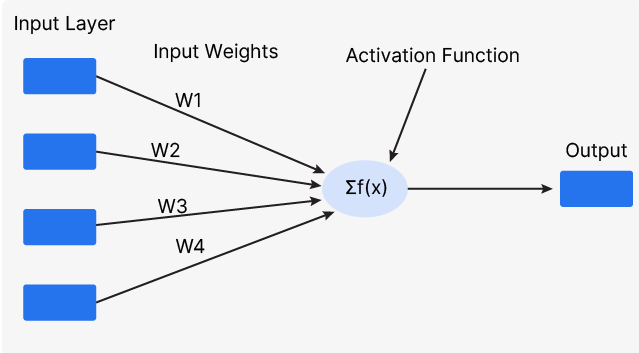


+ σ is the layer ***activation function*** .  

+ Activation functions are transformations that tailor models to your needs.

+ This model has only one weight and one bias.

+ Typical models will have many more. 

+ Weights and biases aare as knobs and levers that Flux uses to tune predictions.

+ This model is ready to predictions (not accurate yet)

In [5]:
# Use the model to perform a prediction 
# Remember that y = 4x + 2
# Remember that x_train = [0 1 2 3 4 5]
# Therefore y = [. . . . ]
# Unfortunately the y predicted is not what we hoped.
# We need to improve 
predict(x_train)

1×6 Matrix{Float32}:
 0.0  -0.584276  -1.16855  -1.75283  -2.33711  -2.92138

### Loss Function

+ To improve predictions, we need a loss function to evaluate the quality of a prediction. 

+ Loss functions compute the cumulative distance between actual values and predictions.

+ Something like this:

[https://docs.google.com/presentation/d/1enC7SsWr4rSFrHYWFym5qbhoVxfDUZQjmAO8euPY2jw/edit#slide=id.g43723a9234_0_3]
        

In [7]:
using Statistics

loss(model, x, y) = mean(abs2.(model(x) .- y));

loss(predict, x_train, y_train)

242.48567f0

### Using the Loss Function 

+ More accurate predictions will yield a lower loss.

+ We can write our own loss functions or use those already provided by Flux.

+ The loss function used here uses Mean Squared Error `(built-in as mse)`.

+ Flux will iterate to reduce the loss during training.

In [10]:
using Flux: train!

opt = Descent()

data = [(x_train, y_train)]

1-element Vector{Tuple{Matrix{Int64}, Matrix{Int64}}}:
 ([0 1 … 4 5], [2 6 … 18 22])

### Using the Optimizer

+ We also need to have an optimizer, so that the architecture looks something like:

    [https://docs.google.com/presentation/d/1enC7SsWr4rSFrHYWFym5qbhoVxfDUZQjmAO8euPY2jw/edit#slide=id.g43723a9234_0_3]

+ The optimizer will use the data and the loss function to modify the weights during train!.

+ All that remains are the parameters of the model. 

+ Each model is just a ***Julia struct*** with a ***function***  and ***configurable parameters*** 

+ The parameters of the dense layer are the weights and biases. In this case both are objs of a single dimension. 

In [8]:
# These are the model parameters

predict.weight

predict.bias



1-element Vector{Float32}:
 0.0

In [11]:
# We train again, this time with the loss, the predict, the data, and the optimizer

train!(loss, predict, data, opt)

In [12]:
loss(predict, x_train, y_train)

230.14441f0

In [13]:
predict.weight, predict.bias

(Float32[8.8202305;;], Float32[2.6921384])

In [14]:
for epoch in 1:200
         train!(loss, predict, data, opt)
       end

loss(predict, x_train, y_train)


predict.weight, predict.bias

(Float32[4.025131;;], Float32[2.0070791])

In [15]:
# Remember that we used
# y =  4x + 2
# x_train = [0 1 2 3 4 5]
# x_test = [6 7 8 9 10]
# y_train = [2 6 10 14 18 22]
# y_test = [26 30 34 38 42]

# therefore when we use the model with x_test we should get...

predict(x_test)

y_test


1×5 Matrix{Int64}:
 26  30  34  38  42

### SUMMARY

+ The predictions are good. These are the steps in this process 

1. Get real-world data into the variables x_train, y_train, x_test, and y_test.

2. The x data defines inputs, and the y data defines outputs. 

3. The x_train data is for training the model, and the y_test data is for verifying the model. 

4. The data was was based on the function y = 4x + 2.

5. Build a single input, single output predictive model, based on a ***dense layer*** 

6. Perform an initial prediction: predict = Dense(1 => 1).

7. The initial prediction is not accurate, because the model was not trained yet.

8. After building the model, we trained it with train!(loss, predict, data, opt).

9. The optimizer is a Descent optimizer provided by Flux.

10. We ran the training step once, and observed that the parameters changed and the loss went down.

11. Then, we ran the train! 200  times to finish the training process.

12. After the model is trained, we verified it with the test data to verify the results.

